<a href="https://colab.research.google.com/github/DimasIlham30/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


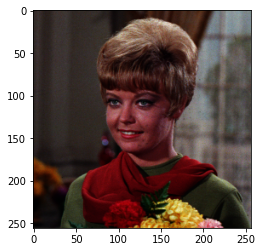

In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


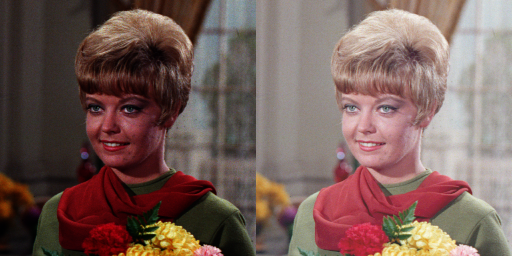

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Nilai PSNR adalah 27.531909760090354 (dB)


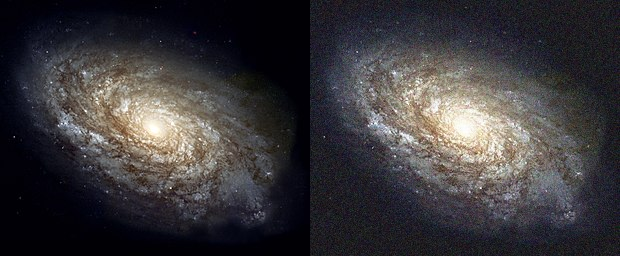

In [5]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):   
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.525409335185795 (dB)


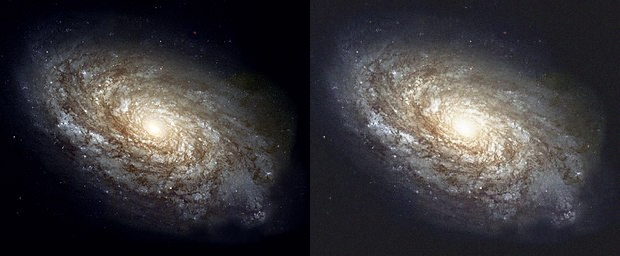

In [6]:
dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.481037411964415 (dB)


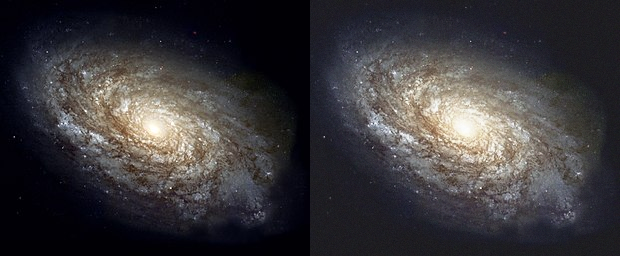

In [7]:
dst = cv_img[0]
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.505426797718002 (dB)


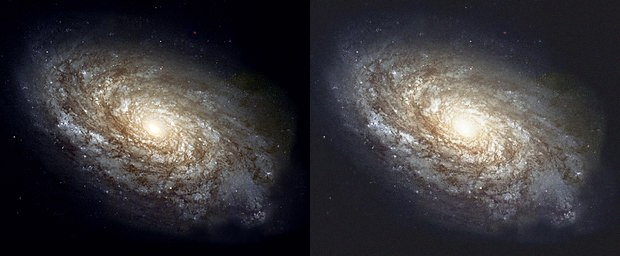

In [8]:
dst = cv_img[0]
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50900176313108 (dB)


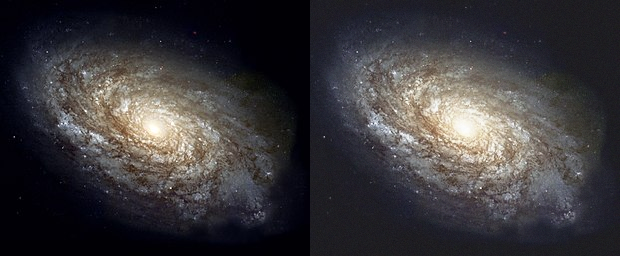

In [9]:
dst = cv_img[0]
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

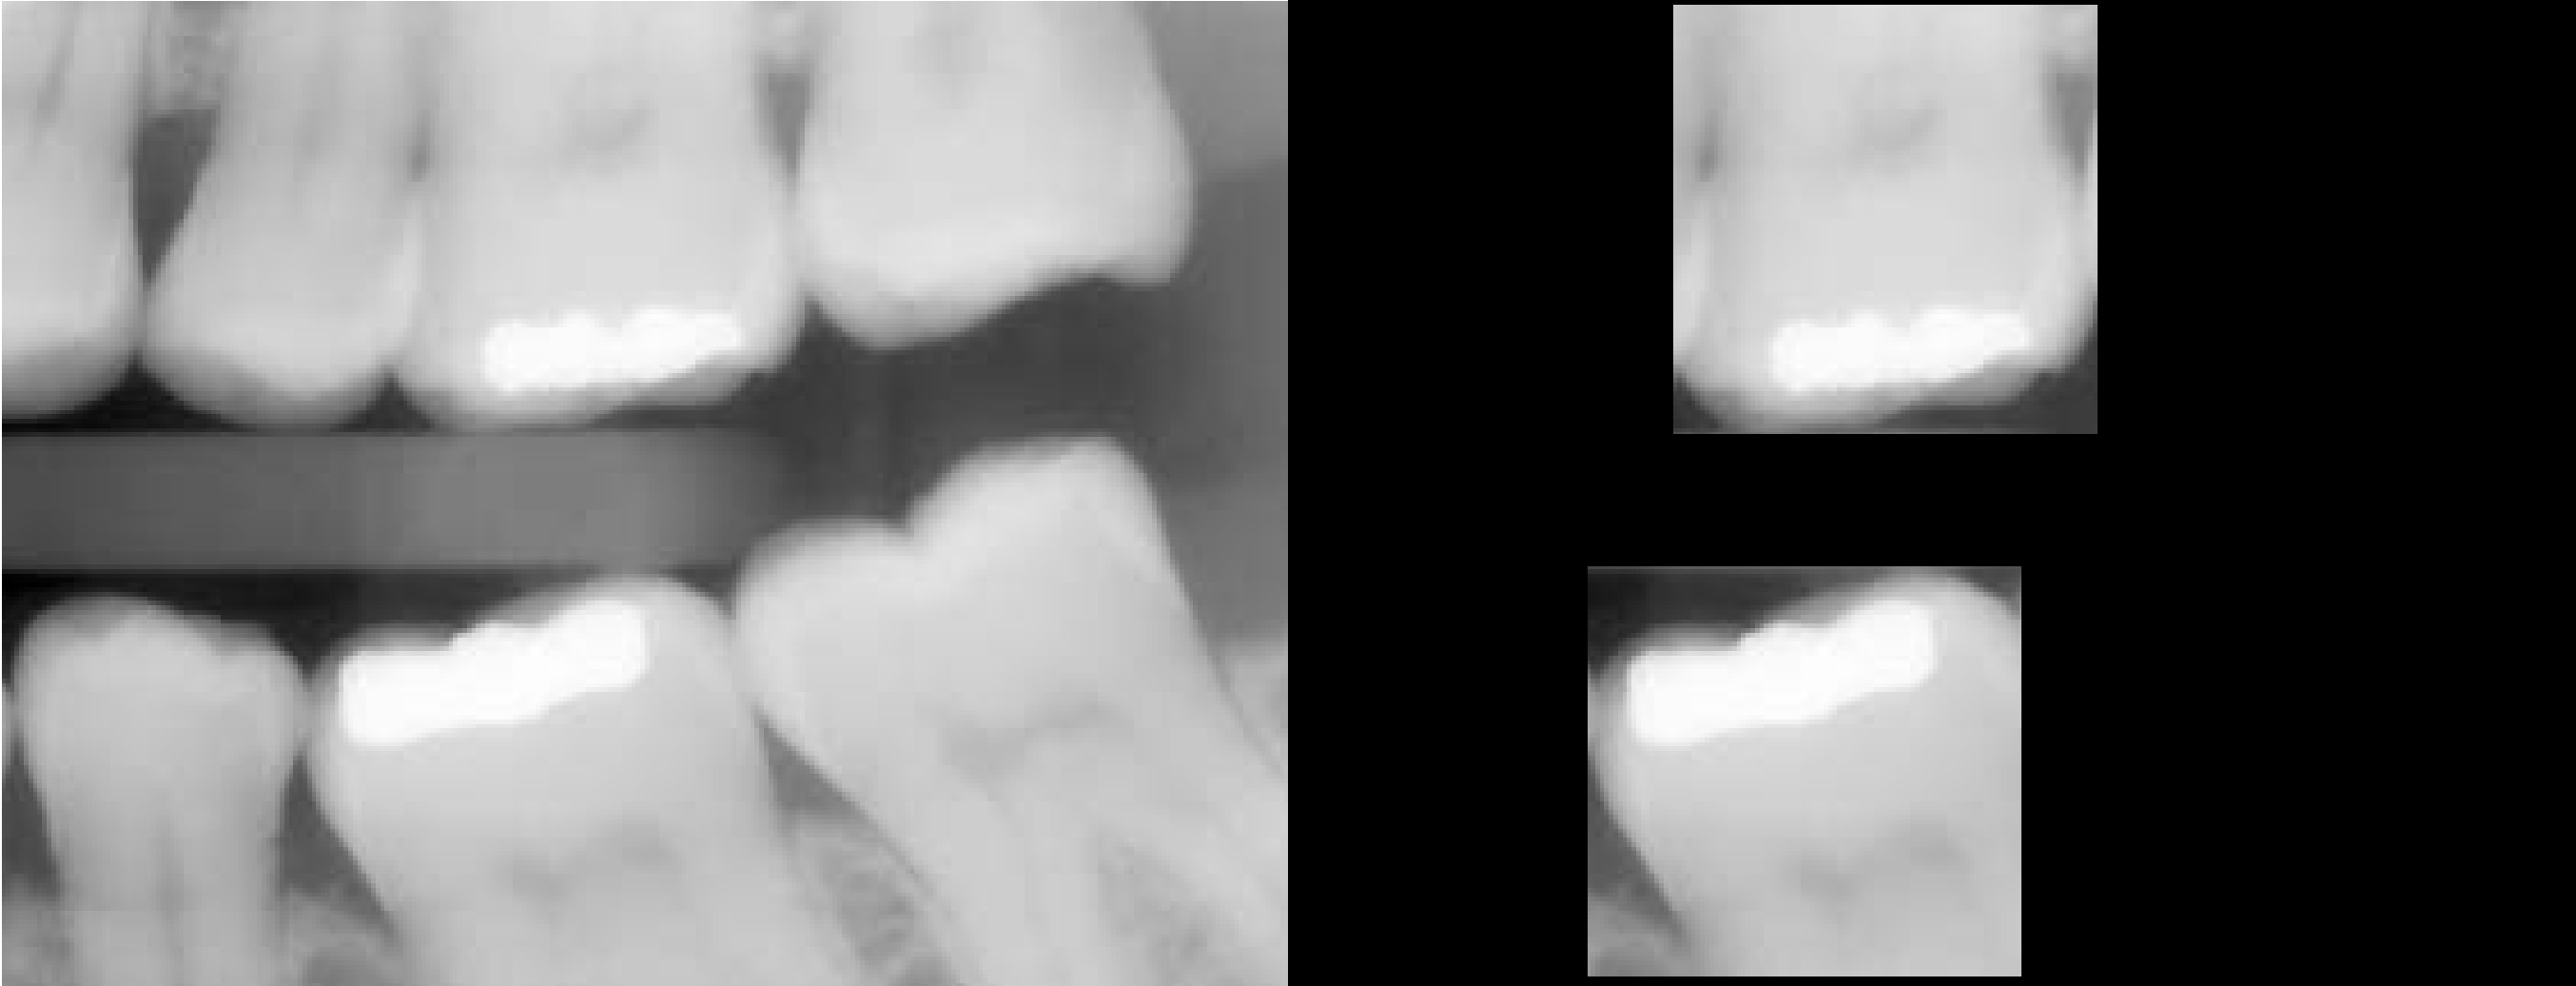

In [10]:
img_t = cv.imread('/content/drive/MyDrive/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

TUGAS

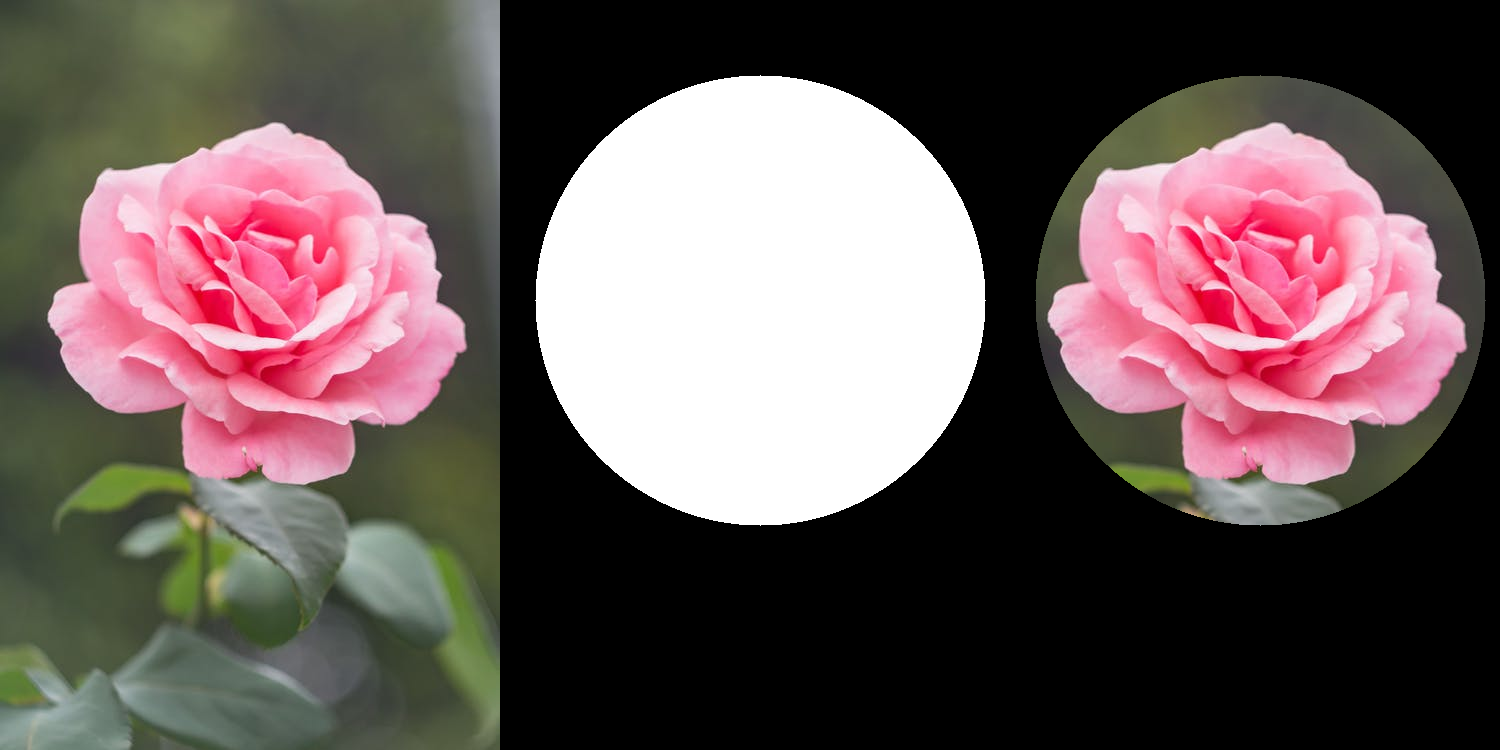

In [11]:
img_rose = cv.imread('/content/drive/MyDrive/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

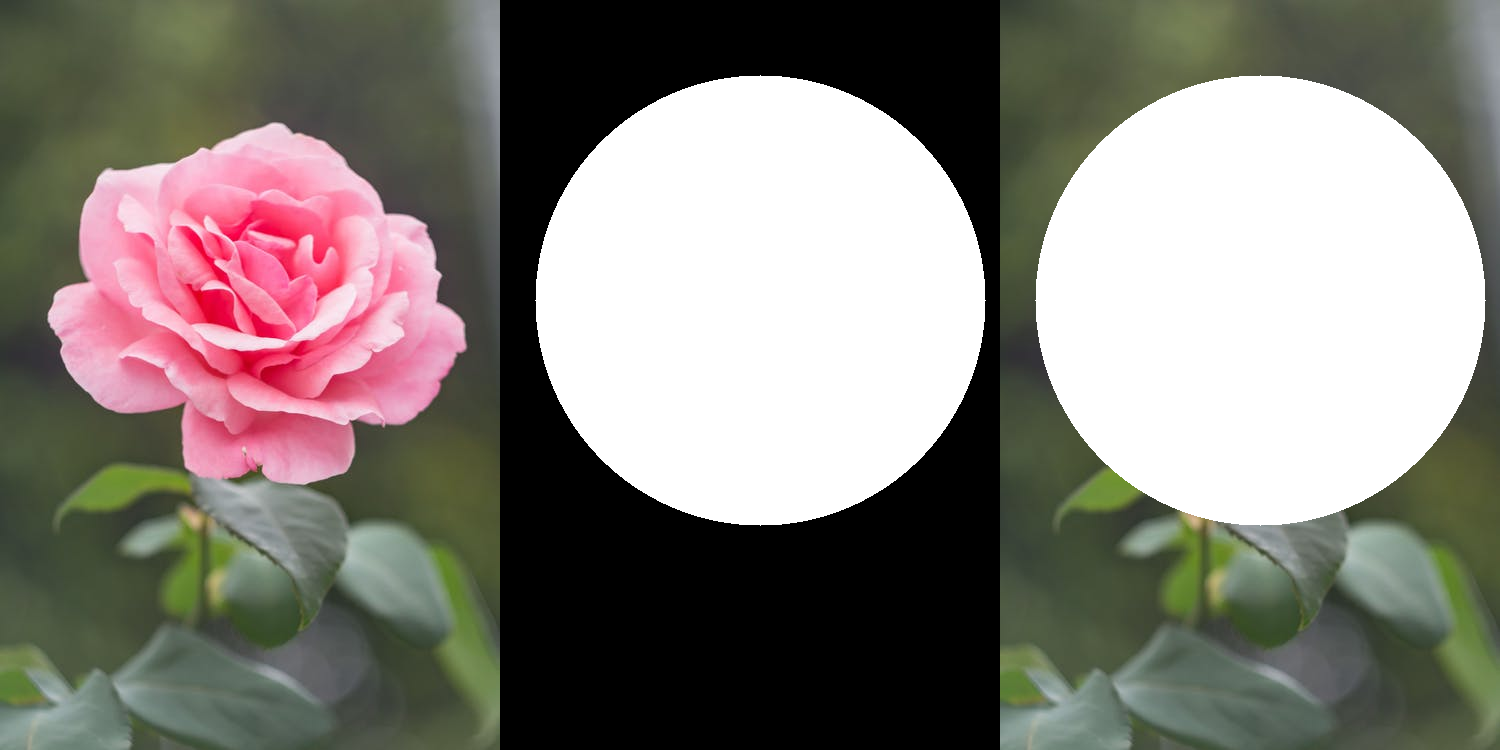

In [12]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

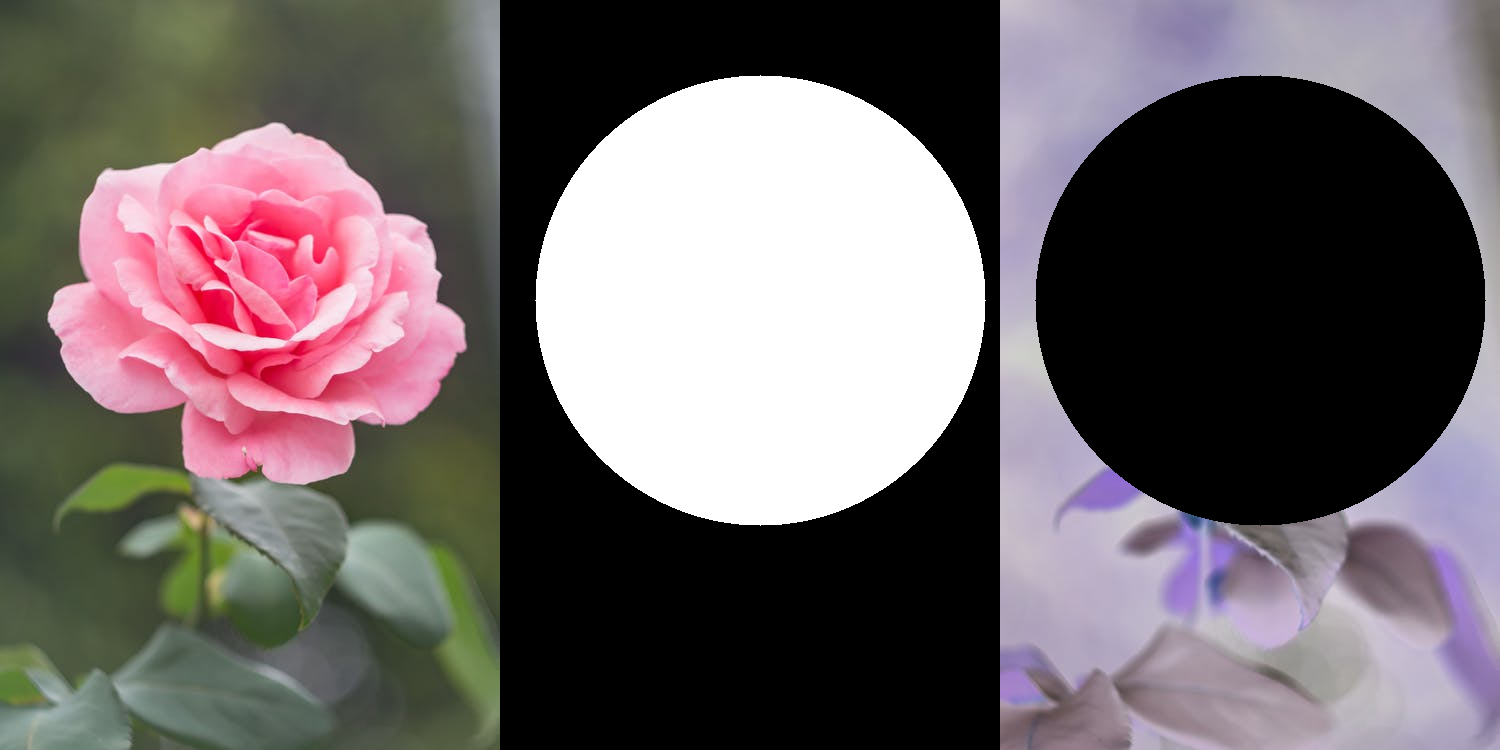

In [13]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

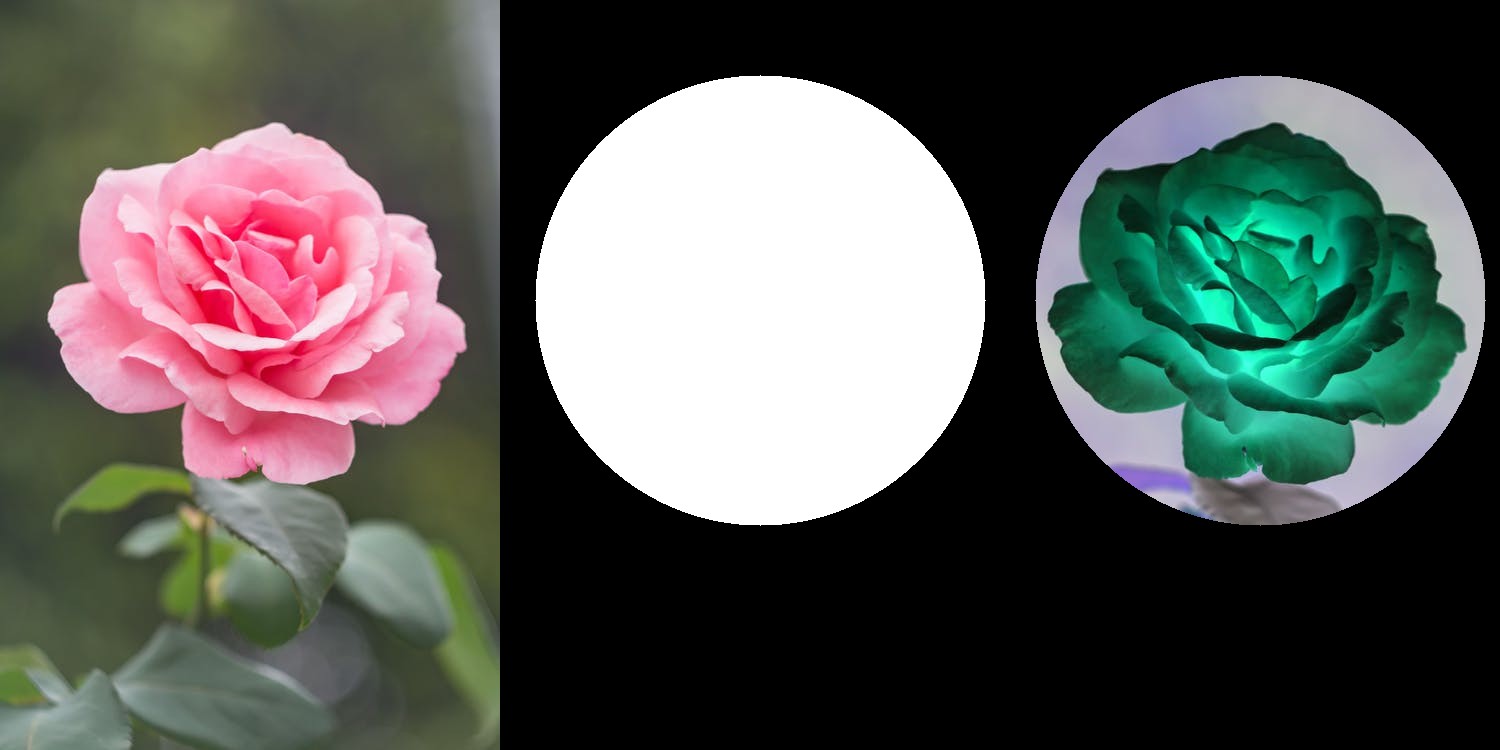

In [14]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

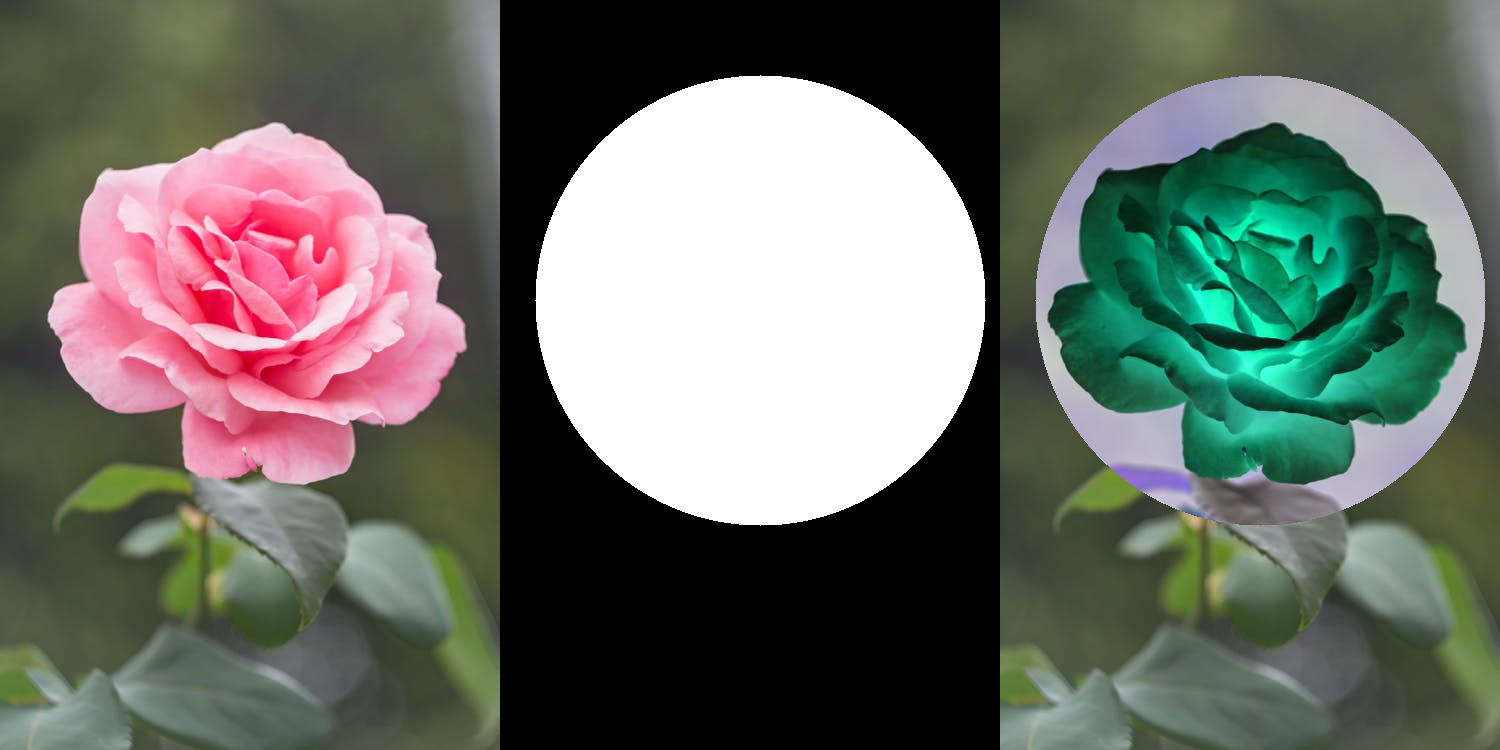

In [15]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)